<a href="https://colab.research.google.com/github/MedhaviNasare02/Tutorial1/blob/main/Assignment2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DEEP LEARNING**

**MULTILAYER PERCEPTRON**

It consists of multiple layers of nodes, each fully connected to the next layer.

*  Structure of MLP:

<u>Input Layer</u>: The first layer that receives the input data.

<u>Hidden Layers</u>: These layers process the input data and learn to detect patterns and features.

How hidden layer works:
Weighted Sum: Each node in the hidden layer takes inputs from the previous layer, multiplies them by weights and adds a bias.

Activation Function: The result of the weighted sum goes through an activation function which decides if the node should be activated or not. This adds non-linearity, allowing the network to understand complex patterns.

<u>Output Layer</u>: The final layer that produces the output. The number of nodes in this layer corresponds to the number of output classes (for classification) or a single node (for regression)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader, random_split

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
input_size = 28 * 28  # MNIST image size is 28x28
hidden_size = 128
output_size = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 10

# MNIST dataset (images and labels)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = MNIST(root='./data', train=False, transform=transform)

# Data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.log_softmax(out)
        return out

# Initialize the model
model = MLP(input_size, hidden_size, output_size).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Function to compute accuracy
def accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == labels).sum().item()
    return correct / labels.size(0)

# Training function
def train_model(model, train_loader, criterion, optimizer, num_epochs):
    total_step = len(train_loader)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (i+1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}')

# Evaluation function
def evaluate_model(model, test_loader):
    model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
    with torch.no_grad():
        total_correct = 0
        total_samples = 0
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total_samples += labels.size(0)
            total_correct += (predicted == labels).sum().item()

        accuracy = total_correct / total_samples
        print(f'Accuracy on test set: {accuracy:.4f} ({total_correct}/{total_samples})')

# Train the model
train_model(model, train_loader, criterion, optimizer, num_epochs)

# Evaluate the model
evaluate_model(model, test_loader)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 56110449.99it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1791683.09it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4711428.25it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3242643.19it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch [1/10], Step [100/938], Loss: 0.5796
Epoch [1/10], Step [200/938], Loss: 0.3551
Epoch [1/10], Step [300/938], Loss: 0.3073
Epoch [1/10], Step [400/938], Loss: 0.2582
Epoch [1/10], Step [500/938], Loss: 0.4371
Epoch [1/10], Step [600/938], Loss: 0.2684
Epoch [1/10], Step [700/938], Loss: 0.3703
Epoch [1/10], Step [800/938], Loss: 0.3247
Epoch [1/10], Step [900/938], Loss: 0.2925
Epoch [2/10], Step [100/938], Loss: 0.2068
Epoch [2/10], Step [200/938], Loss: 0.1004
Epoch [2/10], Step [300/938], Loss: 0.2389
Epoch [2/10], Step [400/938], Loss: 0.2659
Epoch [2/10], Step [500/938], Loss: 0.1461
Epoch [2/10], Step [600/938], Loss: 0.1165
Epoch [2/10], Step [700/938], Loss: 0.2295
Epoch [2/10], Step [800/938], Loss: 0.1635
Epoch [2/10], Step [900/938], Loss: 0.1486
Epoch [3/10], Step [100/938], Loss: 0.2288
Epoch [3/10], Step [200/938], Loss: 0.1183
Epoch [3/10], Step [300/938], Loss: 0.1298
Epoch [3/10], Step [400/938], Loss: 0.0937
Epoch [3/10], Step [500/938], Loss: 0.1944
Epoch [3/10

**ACTIVATION FUNCTION**

Activation functions are mathematical functions used in neural networks to determine the output of a neuron. They introduce non-linearity, allowing the network to learn complex patterns.



**Sigmoid Function**



* The output values range from 0 to 1.

* Formula :
          σ(x)= 1/1+e^-x


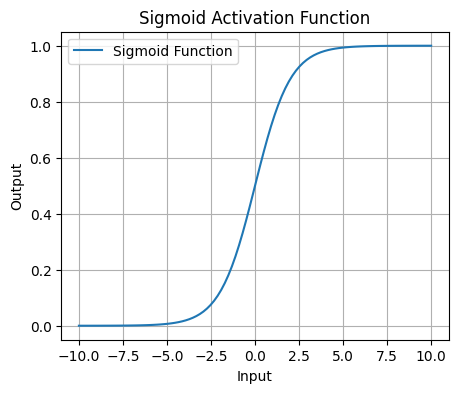

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Create a range of values from -10 to 10
input_values = torch.linspace(-10, 10, 100)

# Define the Sigmoid activation function
sigmoid = nn.Sigmoid()

# Apply the Sigmoid function to the input values
output_values = sigmoid(input_values)

# Convert tensors to numpy arrays for plotting
input_values_np = input_values.numpy()
output_values_np = output_values.numpy()

# Plot the Sigmoid function
plt.figure(figsize=(5, 4))
plt.plot(input_values_np, output_values_np, label='Sigmoid Function')
plt.title('Sigmoid Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import torch
import torch.nn as nn

# Example input tensor
input_tensor = torch.tensor([1.0, 0.2, 3.0, 4.0, 5.0])

# Define the Sigmoid activation function
sigmoid = nn.Sigmoid()

# Apply the Sigmoid function to the input tensor
output_tensor = sigmoid(input_tensor)

# Print the input and output tensors
print("Input Tensor:", input_tensor)
print("Output Tensor:", output_tensor)


Input Tensor: tensor([1.0000, 0.2000, 3.0000, 4.0000, 5.0000])
Output Tensor: tensor([0.7311, 0.5498, 0.9526, 0.9820, 0.9933])


**Hyperbolic Tangent (Tanh) Activation Function**

*  Range-(-1,1)
*  Formula:
            tanh(x)=e^x-e^-x / e^x+e^-x

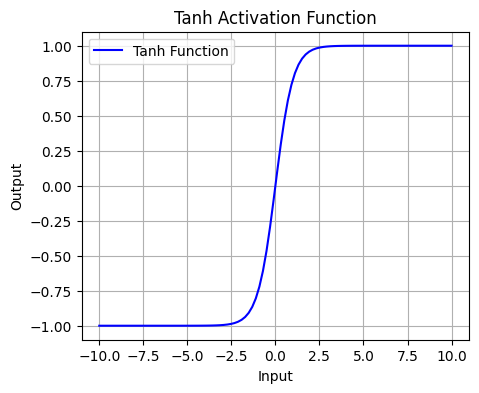

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Create a range of values from -10 to 10
input_values = torch.linspace(-10, 10, 100)

# Define the Tanh activation function
tanh = nn.Tanh()

# Apply the Tanh function to the input values
output_values = tanh(input_values)

# Convert tensors to numpy arrays for plotting
input_values_np = input_values.numpy()
output_values_np = output_values.numpy()

# Plot the Tanh function
plt.figure(figsize=(5, 4))
plt.plot(input_values_np, output_values_np, label='Tanh Function', color='blue')
plt.title('Tanh Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import torch
import torch.nn as nn

# Example input tensor
input_tensor = torch.tensor([-2.0, -1.0, 0.0, 1.0, 2.0])

# Define the Tanh activation function
tanh = nn.Tanh()

# Apply the Tanh function to the input tensor
output_tensor = tanh(input_tensor)

# Print the input and output tensors
print("Input Tensor:", input_tensor)
print("Output Tensor:", output_tensor)


Input Tensor: tensor([-2., -1.,  0.,  1.,  2.])
Output Tensor: tensor([-0.9640, -0.7616,  0.0000,  0.7616,  0.9640])


**ReLU (Rectified Linear Unit) Activation Function**

* ReLU outputs the input directly if it is positive; otherwise, it outputs zero.It's like a switch that turns on if the input is positive and off if it's negative.
* Formula:
             ReLU(x)=max(0,x)
*  Can suffer from "dying ReLU" problem where neurons may become inactive and stop learning if they enter a state where the output is always zero.


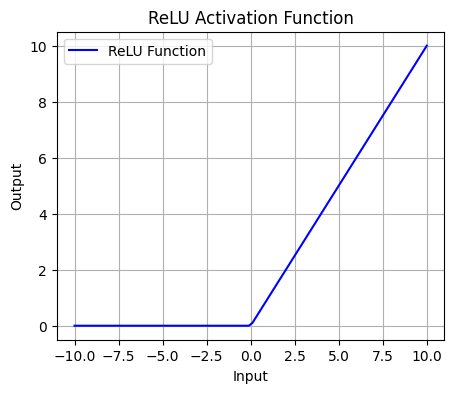

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Create a range of values from -10 to 10
input_values = torch.linspace(-10, 10, 100)

# Define the ReLU activation function
relu = nn.ReLU()

# Apply the ReLU function to the input values
output_values = relu(input_values)

# Convert tensors to numpy arrays for plotting
input_values_np = input_values.numpy()
output_values_np = output_values.numpy()

# Plot the ReLU function
plt.figure(figsize=(5, 4))
plt.plot(input_values_np, output_values_np, label='ReLU Function', color='blue')
plt.title('ReLU Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import torch
import torch.nn as nn

# Example input tensor
input_tensor = torch.tensor([-2.0, -1.0, 0.0, 1.0, 2.0])

# Define the ReLU activation function
relu = nn.ReLU()

# Apply the ReLU function to the input tensor
output_tensor = relu(input_tensor)

# Print the input and output tensors
print("Input Tensor:", input_tensor)
print("Output Tensor:", output_tensor)


Input Tensor: tensor([-2., -1.,  0.,  1.,  2.])
Output Tensor: tensor([0., 0., 0., 1., 2.])


**Leaky ReLU Activation Function**

* Similar to ReLU, but it allows a small, non-zero gradient when the input is negative.
*  Helps to avoid the "dying ReLU" problem where neurons can get stuck and stop learning.
* Formula:
            Leaky ReLU(x)=  x   if x≥0
                            αx  if x<0

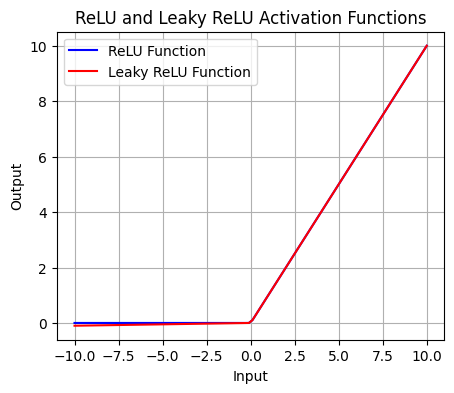

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Create a range of values from -10 to 10
input_values = torch.linspace(-10, 10, 100)

# Define the ReLU activation function
relu = nn.ReLU()

# Define the Leaky ReLU activation function with a negative slope of 0.01
leaky_relu = nn.LeakyReLU(negative_slope=0.01)

# Apply the ReLU function to the input values
output_values_relu = relu(input_values)

# Apply the Leaky ReLU function to the input values
output_values_leaky_relu = leaky_relu(input_values)

# Convert tensors to numpy arrays for plotting
input_values_np = input_values.numpy()
output_values_relu_np = output_values_relu.numpy()
output_values_leaky_relu_np = output_values_leaky_relu.numpy()

# Plot the ReLU and Leaky ReLU functions
plt.figure(figsize=(5, 4))

plt.plot(input_values_np, output_values_relu_np, label='ReLU Function', color='blue')
plt.plot(input_values_np, output_values_leaky_relu_np, label='Leaky ReLU Function', color='red')

plt.title('ReLU and Leaky ReLU Activation Functions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()

**LOSS FUNCTION**

Loss Function measures the difference between predicted output and the actual value



For regression problem we used,
Mean Squared Error (MSE):It the average squared difference between predicted and actual values.

In [ ]:
import torch
import torch.nn.functional as F

true_v = torch.tensor([3.0, 2.0, 4.0, 1.0])  #  true values
pred_v = torch.tensor([2.5, 1.5, 3.5, 0.5])  #  predicted values

# Mean Squared Error (MSE) Loss
mse_loss = F.mse_loss(pred_v, true_v)
print(f"Mean Squared Error Loss: {mse_loss.item()}")


Mean Squared Error Loss: 0.25


Classification Problems:

Binary Cross-Entropy Loss: Used for binary classification tasks where the model predicts probabilities for two classes

In [ ]:
import torch
import torch.nn.functional as F

y_true_binary = torch.tensor([1, 0, 1, 0])  # Binary labels (0 or 1)
y_pred_binary = torch.tensor([0.9, 0.1, 0.8, 0.2])  # Predicted probabilities for binary classification

# Ensure y_true_binary and y_pred_binary have the same shape
assert y_true_binary.shape == y_pred_binary.shape, "Shapes of y_true_binary and y_pred_binary must match."

# Convert y_true_binary to float if it's not already
y_true_binary_float = y_true_binary.float()

# Binary Cross-Entropy Loss
bce_loss = F.binary_cross_entropy(y_pred_binary, y_true_binary_float)
print(f"Binary Cross-Entropy Loss: {bce_loss.item()}")


Binary Cross-Entropy Loss: 0.16425204277038574


Categorical Cross-Entropy Loss: Used for multi-class classification tasks where the model predicts probabilities across multiple classes.

In [ ]:
import torch
import torch.nn.functional as F

# Example ground truth and predicted values (PyTorch tensors)
# Replace these with your actual data
y_true_categorical = torch.tensor([0, 1, 2])  # Categorical labels (0, 1, or 2)
y_pred_categorical = torch.tensor([[0.8, 0.1, 0.1], [0.2, 0.5, 0.3], [0.1, 0.2, 0.7]])  # Predicted probabilities

# Categorical Cross-Entropy Loss
ce_loss = F.cross_entropy(y_pred_categorical, y_true_categorical)
print(f"Categorical Cross-Entropy Loss: {ce_loss.item()}")


Categorical Cross-Entropy Loss: 0.7991690635681152


Hinge Loss: Used for binary classification, particularly with Support Vector Machines.

**CNN**

CNNs are a type of deep learning model designed specifically for tasks involving images, videos, and other spatial data. They are powerful because they can automatically learn to recognize patterns directly from raw pixel data.

Example:Imagine you want to teach a computer to distinguish between cats and dogs in pictures. A CNN will start by learning basic features like edges and shapes (from convolutional layers), then combine these to recognize higher-level patterns like ears, eyes, and noses (through pooling and activation functions). Finally, fully connected layers will analyze these patterns to decide if the picture shows a cat or a dog.

In essence, CNNs are specialized for handling visual data and have revolutionized fields like computer vision by enabling machines to see and understand images much like humans do.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 10

# MNIST dataset (images and labels)
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image or numpy.ndarray to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize images with mean and std
])

train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = MNIST(root='./data', train=False, transform=transform)

# Data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define the CNN model
class CNN(nn.Module):
    def __init__(self, num_classes=10):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc = nn.Linear(7*7*32, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc(x)
        return x

# Initialize the model
model = CNN(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training function
def train_model(model, train_loader, criterion, optimizer, num_epochs):
    total_step = len(train_loader)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (i+1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}')

# Evaluation function
def evaluate_model(model, test_loader):
    model.eval()  # Switch to evaluation mode
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        accuracy = correct / total
        print(f'Accuracy on test set: {accuracy:.4f} ({correct}/{total})')

# Train the model
train_model(model, train_loader, criterion, optimizer, num_epochs)

# Evaluate the model
evaluate_model(model, test_loader)


Epoch [1/10], Step [100/938], Loss: 0.2843
Epoch [1/10], Step [200/938], Loss: 0.2624
Epoch [1/10], Step [300/938], Loss: 0.1220
Epoch [1/10], Step [400/938], Loss: 0.0593
Epoch [1/10], Step [500/938], Loss: 0.1264
Epoch [1/10], Step [600/938], Loss: 0.0398
Epoch [1/10], Step [700/938], Loss: 0.0755
Epoch [1/10], Step [800/938], Loss: 0.1113
Epoch [1/10], Step [900/938], Loss: 0.0758
Epoch [2/10], Step [100/938], Loss: 0.0605
Epoch [2/10], Step [200/938], Loss: 0.0408
Epoch [2/10], Step [300/938], Loss: 0.0378
Epoch [2/10], Step [400/938], Loss: 0.0944
Epoch [2/10], Step [500/938], Loss: 0.0188
Epoch [2/10], Step [600/938], Loss: 0.0147
Epoch [2/10], Step [700/938], Loss: 0.0330
Epoch [2/10], Step [800/938], Loss: 0.0649
Epoch [2/10], Step [900/938], Loss: 0.0551
Epoch [3/10], Step [100/938], Loss: 0.0564
Epoch [3/10], Step [200/938], Loss: 0.0147
Epoch [3/10], Step [300/938], Loss: 0.0078
Epoch [3/10], Step [400/938], Loss: 0.0412
Epoch [3/10], Step [500/938], Loss: 0.0810
Epoch [3/10

**RNN**

RNN stands for Recurrent Neural Network. This type of neural network is used for sequential data such as text data ,DNA sequence, speech, Time series data and many others. It is used where the order of data matters a lot.

A recurrent neural network, however, is able to remember those characters because of its internal memory.

In this network output is not only depend on current input but also depend on previous output in the sequence


Epoch 10/100, Loss: 0.0108
Epoch 20/100, Loss: 0.0089
Epoch 30/100, Loss: 0.0084
Epoch 40/100, Loss: 0.0025
Epoch 50/100, Loss: 0.0023
Epoch 60/100, Loss: 0.0037
Epoch 70/100, Loss: 0.0019
Epoch 80/100, Loss: 0.0066
Epoch 90/100, Loss: 0.0013
Epoch 100/100, Loss: 0.0005


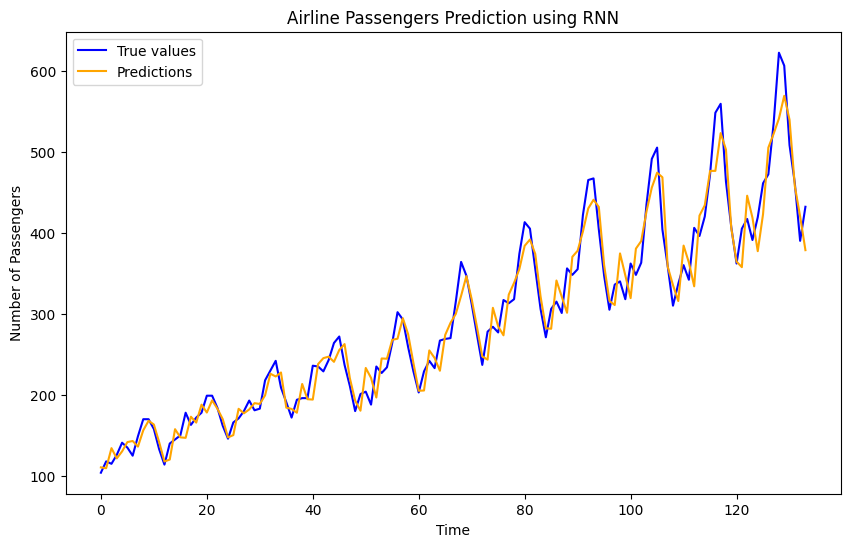

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url, usecols=[1])

# Convert to numpy array and normalize
data = data.values.astype(float)
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# Create sequences for training
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Define the sequence length
seq_length = 10

# Create sequences and targets
X, y = create_sequences(data, seq_length)

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Create DataLoader for batching
batch_size = 16
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define the RNN model
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, n_layers=1):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.n_layers = n_layers
        self.rnn = nn.RNN(input_size, hidden_size, n_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.n_layers, x.size(0), self.hidden_size).to(x.device)

        # Forward propagate RNN
        out, hn = self.rnn(x, h0)

        # Take the output of the last time step
        out = self.fc(out[:, -1, :])
        return out

# Parameters for the model
input_size = 1     # Number of features in the input
hidden_size = 50   # Number of features in the hidden state
output_size = 1    # Number of output features
n_layers = 2       # Number of RNN layers

# Create the RNN model
model = RNN(input_size, hidden_size, output_size, n_layers)

# Define the loss function and optimizer
criterion = nn.MSELoss()                # Mean Squared Error loss
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Training loop
num_epochs = 100                         # Number of training epochs
for epoch in range(num_epochs):
    for batch in dataloader:
        x_batch, y_batch = batch        # Get the batch
        optimizer.zero_grad()           # Clear gradients
        y_pred = model(x_batch)        # Forward pass
        loss = criterion(y_pred, y_batch)  # Compute loss
        loss.backward()                 # Backpropagation
        optimizer.step()                # Update weights

    if (epoch + 1) % 10 == 0:          # Print loss every 10 epochs
        print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}')

# Make predictions
model.eval()                          # Set model to evaluation mode
with torch.no_grad():
    train_pred = model(X).cpu().numpy()  # Predict on the training data

# Inverse transform the predictions
train_pred = scaler.inverse_transform(train_pred)  # Scale back to original values
true_values = scaler.inverse_transform(y.cpu().numpy())  # True values

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(true_values, label='True values', color='blue')   # True values
plt.plot(train_pred, label='Predictions', color='orange')  # Predicted values
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.title('Airline Passengers Prediction using RNN')
plt.legend()
plt.show()


**TRANSFORMER**

A Transformer is a neural network architecture designed for processing sequences of data, primarily used in tasks like natural language processing. It addresses some limitations of RNNs, such as difficulty with long-term dependencies, by relying on attention mechanisms.
It consist of two main parts:
* Encoder
* Decoder

Together, the encoder processes the input sequence, and the decoder generates the output sequence.


In [ ]:
import torch
import torch.nn as nn

# Simplified Multi-Head Attention
class SimpleMultiHeadAttention(nn.Module):
    def __init__(self, d_model, nhead):
        super(SimpleMultiHeadAttention, self).__init__()
        self.attention = nn.MultiheadAttention(d_model, nhead)

    def forward(self, query, key, value):
        query, key, value = query.permute(1, 0, 2), key.permute(1, 0, 2), value.permute(1, 0, 2)
        attn_output, _ = self.attention(query, key, value)
        return attn_output.permute(1, 0, 2)

# Simplified Transformer Encoder Layer
class SimpleTransformerEncoderLayer(nn.Module):
    def __init__(self, d_model, nhead):
        super(SimpleTransformerEncoderLayer, self).__init__()
        self.self_attention = SimpleMultiHeadAttention(d_model, nhead)
        self.feed_forward = nn.Sequential(
            nn.Linear(d_model, d_model),
            nn.ReLU(),
            nn.Linear(d_model, d_model)
        )
        self.layer_norm1 = nn.LayerNorm(d_model)
        self.layer_norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        # Self-Attention
        attn_output = self.self_attention(x, x, x)
        x = self.layer_norm1(x + self.dropout(attn_output))
        # Feed Forward
        ff_output = self.feed_forward(x)
        x = self.layer_norm2(x + self.dropout(ff_output))
        return x

# Simplified Transformer Decoder Layer
class SimpleTransformerDecoderLayer(nn.Module):
    def __init__(self, d_model, nhead):
        super(SimpleTransformerDecoderLayer, self).__init__()
        self.self_attention = SimpleMultiHeadAttention(d_model, nhead)
        self.encoder_attention = SimpleMultiHeadAttention(d_model, nhead)
        self.feed_forward = nn.Sequential(
            nn.Linear(d_model, d_model),
            nn.ReLU(),
            nn.Linear(d_model, d_model)
        )
        self.layer_norm1 = nn.LayerNorm(d_model)
        self.layer_norm2 = nn.LayerNorm(d_model)
        self.layer_norm3 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(0.1)

    def forward(self, tgt, memory):
        # Self-Attention
        self_attn_output = self.self_attention(tgt, tgt, tgt)
        tgt = self.layer_norm1(tgt + self.dropout(self_attn_output))
        # Encoder-Decoder Attention
        enc_dec_attn_output = self.encoder_attention(tgt, memory, memory)
        tgt = self.layer_norm2(tgt + self.dropout(enc_dec_attn_output))
        # Feed Forward
        ff_output = self.feed_forward(tgt)
        tgt = self.layer_norm3(tgt + self.dropout(ff_output))
        return tgt

# Complete Simplified Transformer Model
class SimpleTransformer(nn.Module):
    def __init__(self, d_model, nhead, num_encoder_layers, num_decoder_layers):
        super(SimpleTransformer, self).__init__()
        self.encoder_layers = nn.ModuleList([
            SimpleTransformerEncoderLayer(d_model, nhead) for _ in range(num_encoder_layers)
        ])
        self.decoder_layers = nn.ModuleList([
            SimpleTransformerDecoderLayer(d_model, nhead) for _ in range(num_decoder_layers)
        ])
        self.fc_out = nn.Linear(d_model, 1)  # Output layer (e.g., for regression tasks)

    def forward(self, src, tgt):
        memory = src
        for layer in self.encoder_layers:
            memory = layer(memory)
        output = tgt
        for layer in self.decoder_layers:
            output = layer(output, memory)
        output = self.fc_out(output)
        return output

# Example usage
if __name__ == "__main__":
    d_model = 64
    nhead = 4
    num_encoder_layers = 2
    num_decoder_layers = 2

    model = SimpleTransformer(d_model, nhead, num_encoder_layers, num_decoder_layers)

    # Dummy input (sequence length=10, batch size=32, feature size=64)
    src = torch.randn(32, 10, d_model)  # Source sequence
    tgt = torch.randn(32, 10, d_model)  # Target sequence
    output = model(src, tgt)
    print(output.shape)


torch.Size([32, 10, 1])
